## instructions
1. get either a pdf of the datasheet or take a screenshot
2. get [inkscape]() (one could also easily use other programs to trace the graph from the datasheet but that is outside of the scope of this tutorial)
    1. import the pdf by draging it into inscape, make sure internal import is selected and the page that contains the graph of interest is selected, it should look like this:
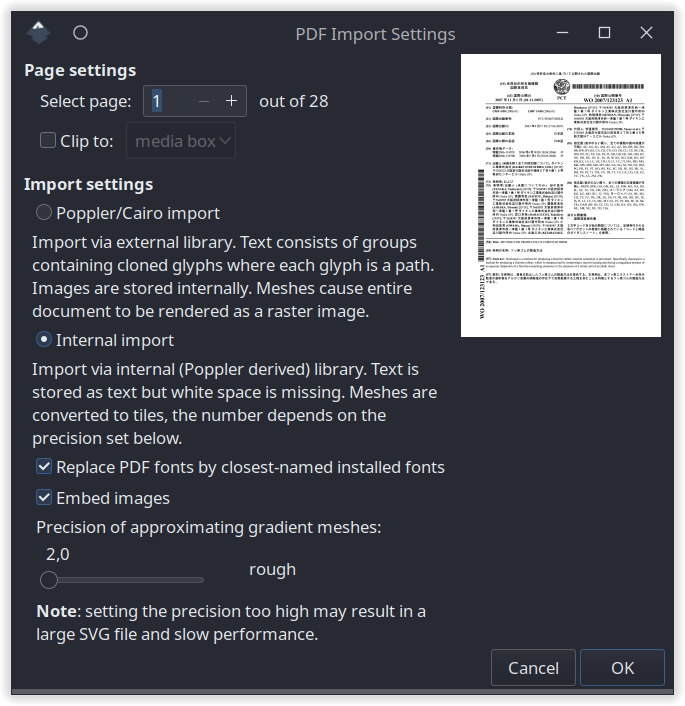

    2. if no pdf could be obtained then take a screenshot of the datasheet and drag or paste it into inkscape
    
3. stretch the graph from the datasheet it horizontally to align the grid to the grid from the template
1. press `ctrl + shift + L` to view the layers menu, and select the `datasheet graph` layer
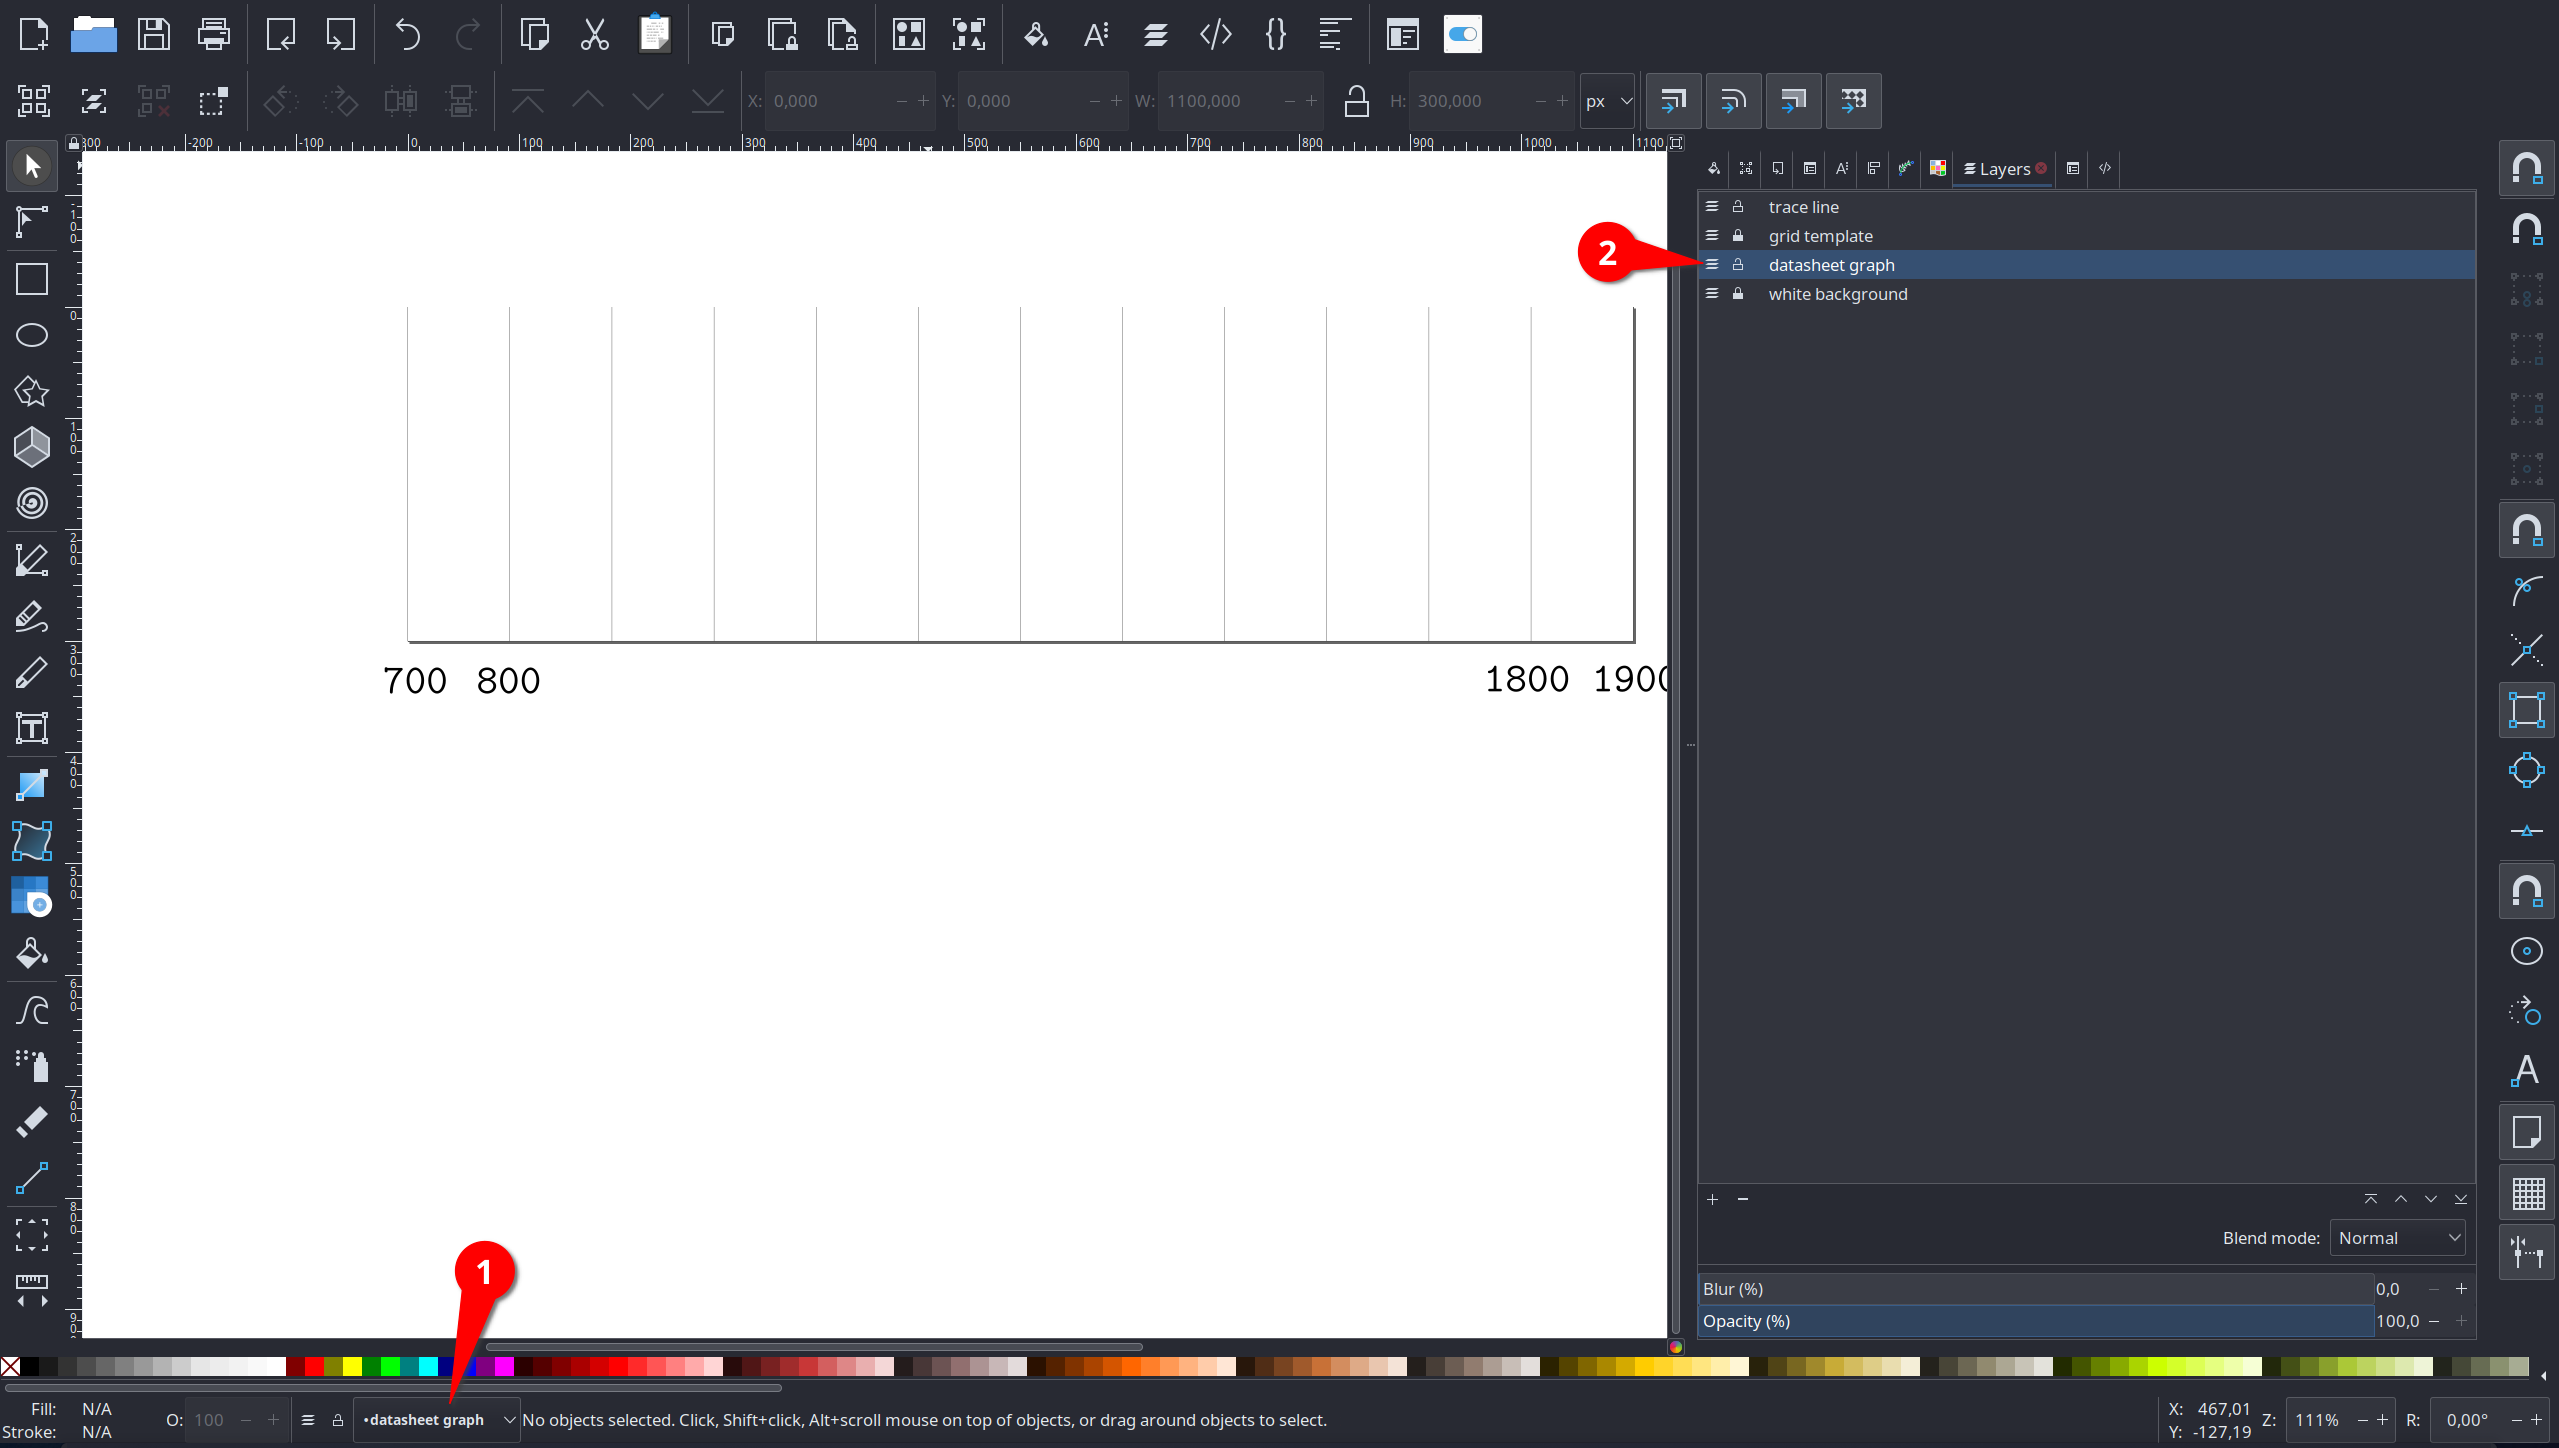
4. stretch the graph vertically to align the maximum with the top of the template and the bottom (or 0 intensity) with the bottom of the template like this:
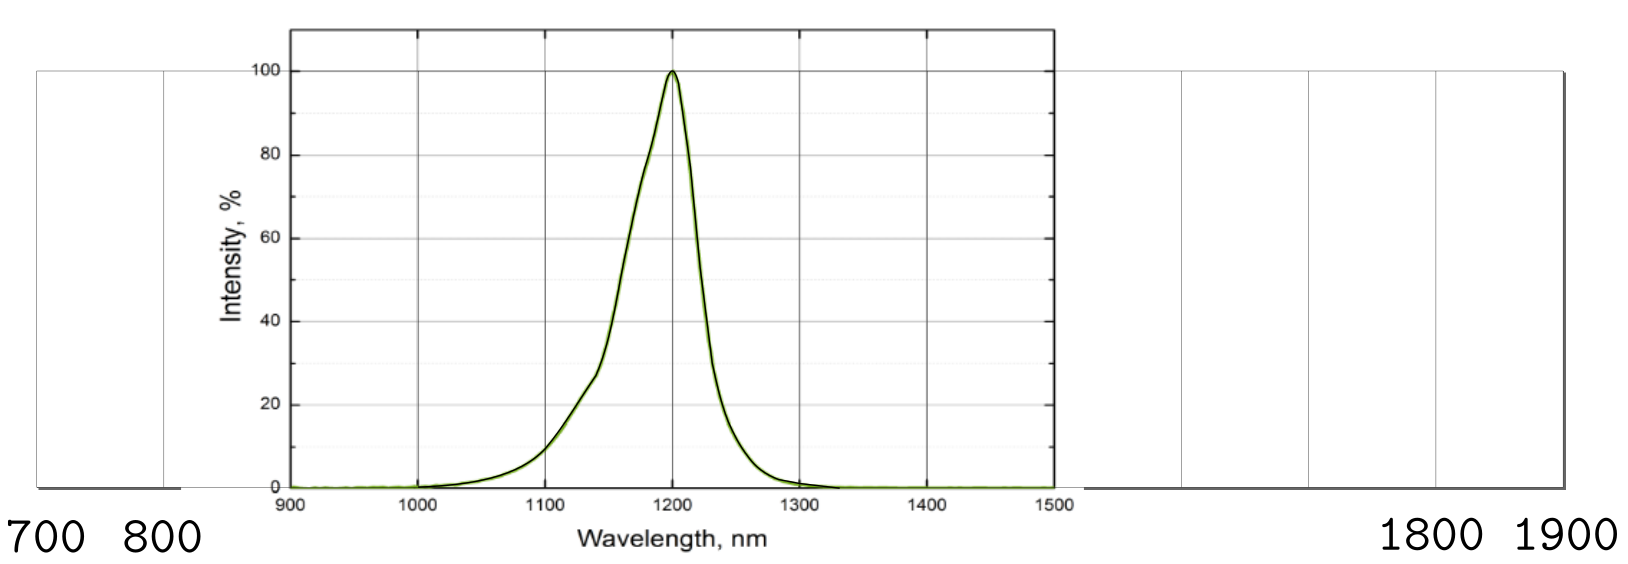
1. stretch the graph horizontally to align the ticks with those of the template
1. select the `trace line` layer
5. use the `Draw Bezier cuves and straight lines` button to trace the original line, format this line so that the thickness does not exceed the thickness of the line from the datasheet (you can select this tool by pressing `b`)
6. the trace can be eddited by pressing `F2`
1. after tracing press `ctrl + shift + E` to export the graph. Select `page` and export by using `Export As`
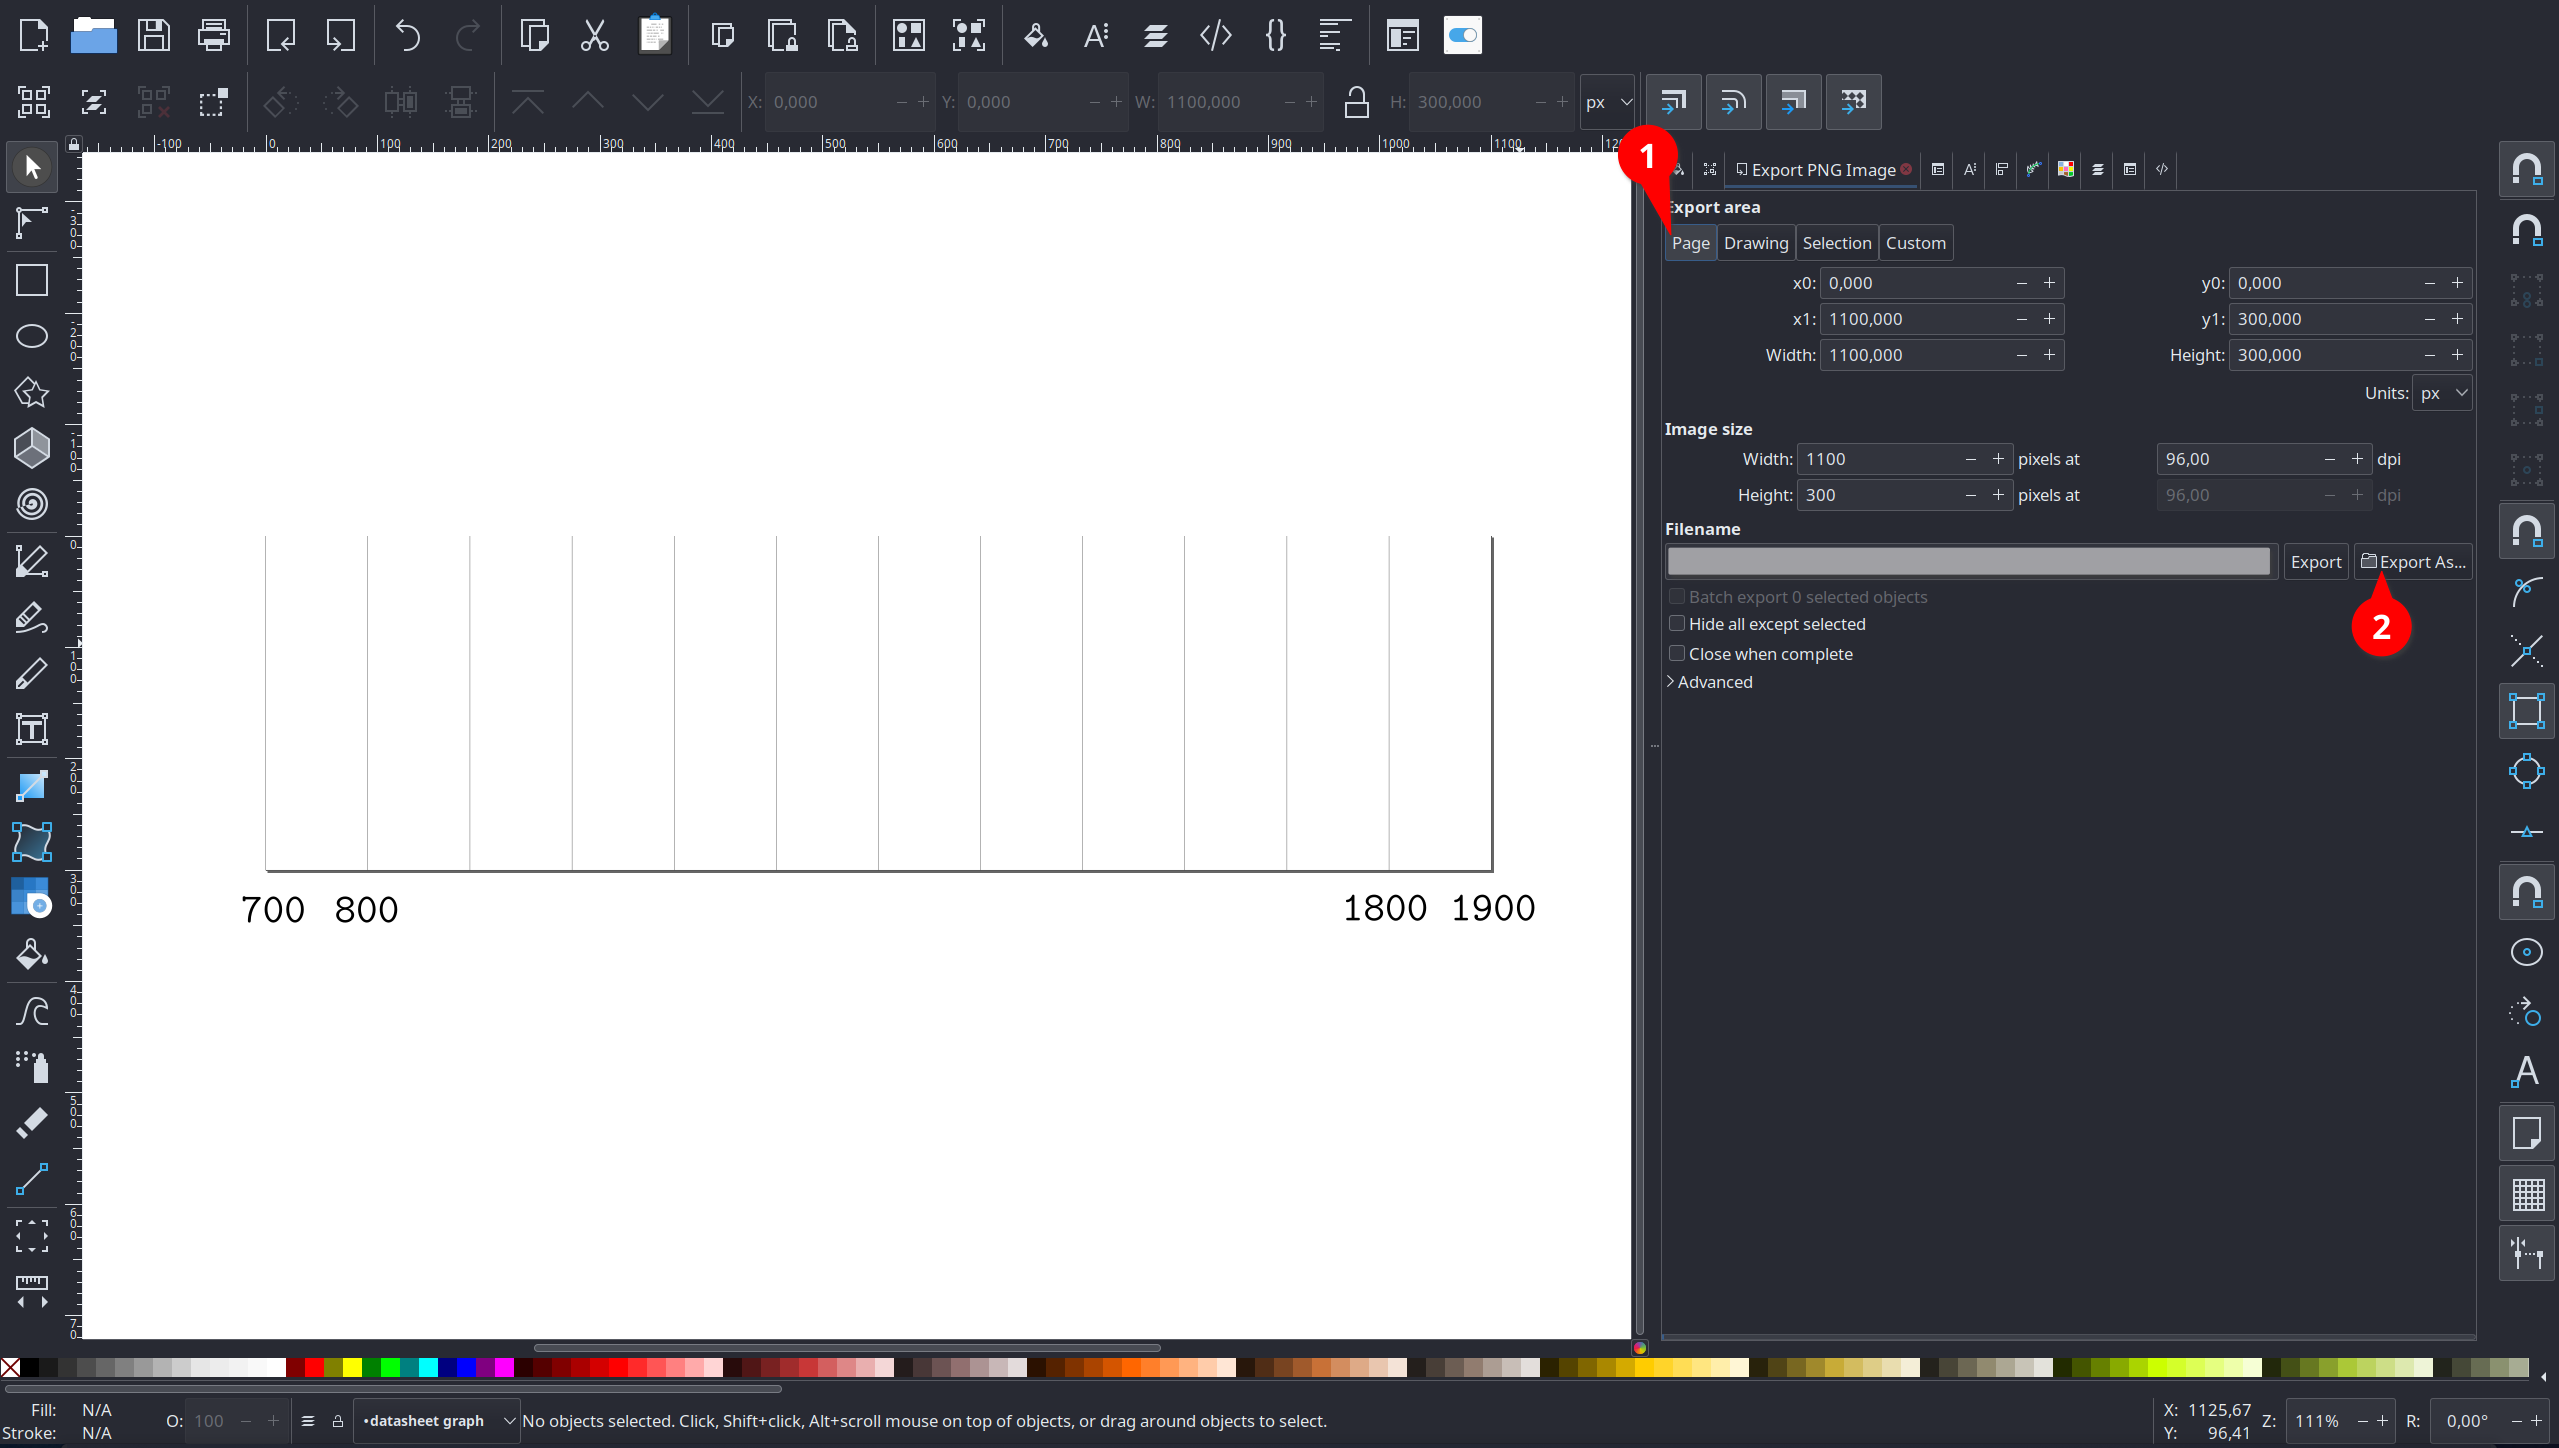

## import packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image # pip install pillow
import glob

## list all png files in the `png` folder

In [2]:
files = glob.glob("./png/*.png")
files

['./png/1200.png',
 './png/1550.png',
 './png/1650.png',
 './png/PP.png',
 './png/PVC.png',
 './png/940.png',
 './png/1720.png',
 './png/sensor.png',
 './png/1050.png',
 './png/1300.png',
 './png/1460.png',
 './png/PET.png']

## convert all images to arrays

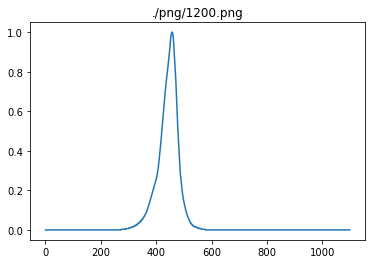

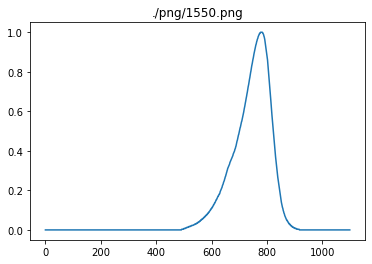

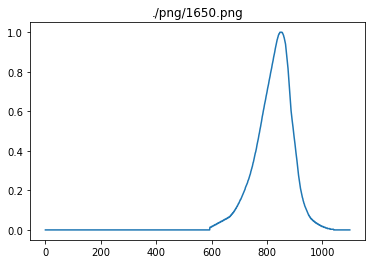

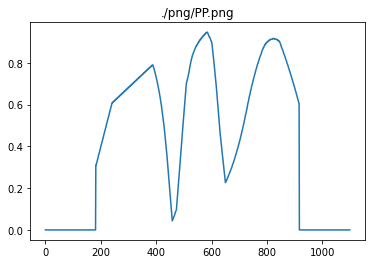

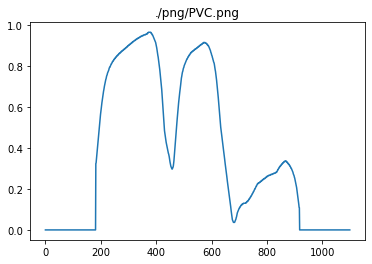

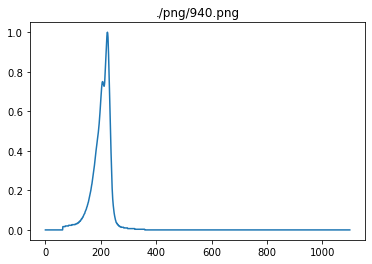

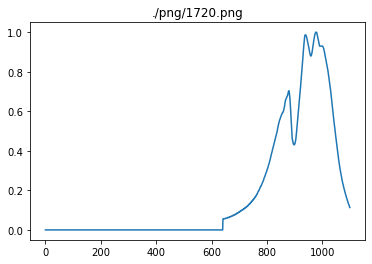

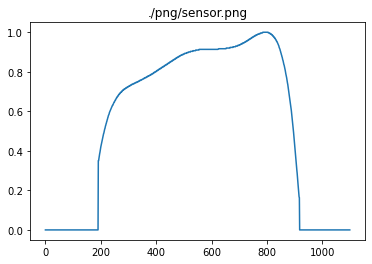

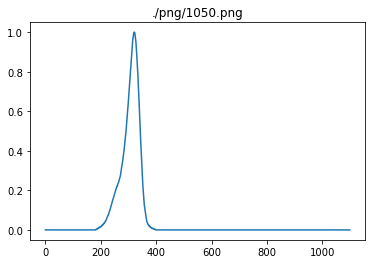

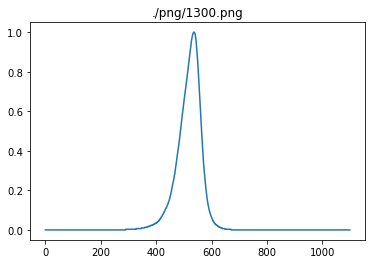

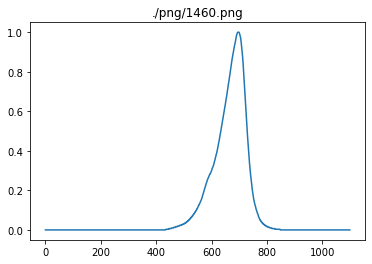

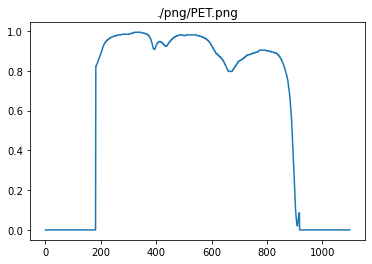

In [3]:
files = glob.glob("./png/*.png")

for file in files:
    # load image file
    curve_im = Image.open(file).convert("L")
    curve_arr = np.array(curve_im)

    # extract graph
    mask = np.any(curve_arr != 255, 0)
    masked = curve_arr[:, mask]
    mini = np.min(masked, 0)
    high = (
        1 - np.array([np.mean(np.where(x == y)) for x, y in zip(mini, masked.T)]) / 300
    )

    curve = np.zeros(len(curve_arr[0]))
    curve[mask] = high

    # plot curve
    plt.plot(curve)
    plt.title(file)
    plt.show()

    # save as npy file
    fname = file.split("/")[-1].split(".")[0]
    path = f"./arrays/{fname}.npy"
    np.save(path, curve)